<a href="https://colab.research.google.com/github/jpastor1649/Teoinfo-2025I/blob/main/LABS/LabIB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**LABORATORIO – “TRANSMISIÓN DIGITAL DE SEÑALES ANALÓGICAS”**

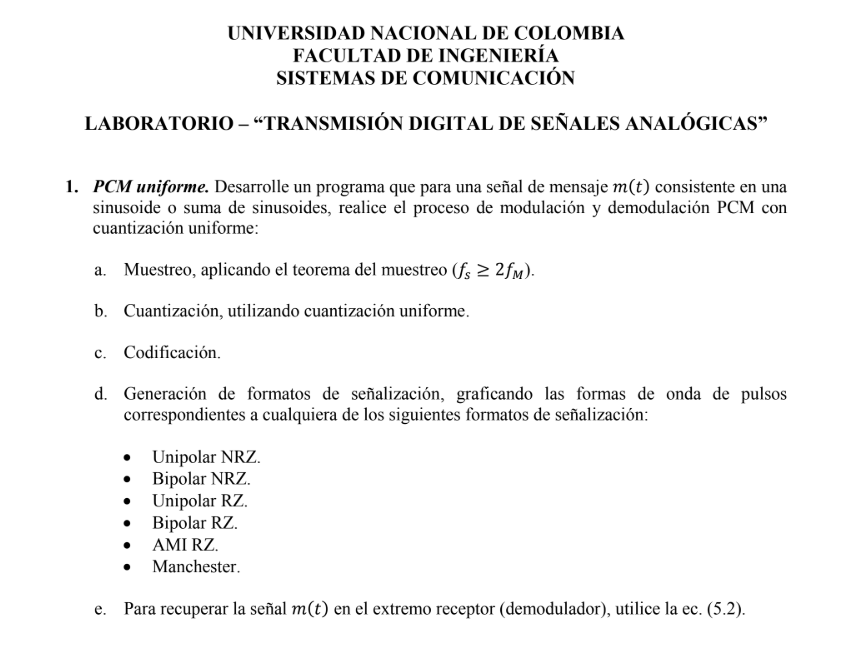

# **1. Importación de librerías**
### Se importan las bibliotecas necesarias para cálculo numérico y gráficos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# **2. Configuración de parámetros**
### Valores fundamentales para la simulación

In [ ]:
fm1 = 5      # frecuencia seno principal [Hz]
fm2 = 15     # frecuencia seno secundaria [Hz]
Am1 = 1.0    # amplitud seno principal [V]
Am2 = 0.5    # amplitud seno secundaria [V]
fs = 100         # Frecuencia de muestreo (Hz)
t_final = 1     # Duración de la señal (segundos)
bits = 3        # Bits para cuantización
fm_max  = max(fm1, fm2)
nyquist = 2 * fm_max  #la tasa de muestro debe ser al menos el doble de las frecuencias maximas

# **3. Generación de señal analógica y muestreo (Parte a)**

1. Crea una señal senoidal
2. Realiza el muestreo según el teorema de Nyquist
3. Grafica la señal original y las muestras tomadas

=== ETAPA 1: MUESTREO ===
Frecuencia de la señal: 5 Hz
Amplitud máxima: 1.0 V
Frecuencia de muestreo: 100 Hz
Tasa de Nyquist (2·fmax): 30 Hz
¿Cumple Nyquist? True


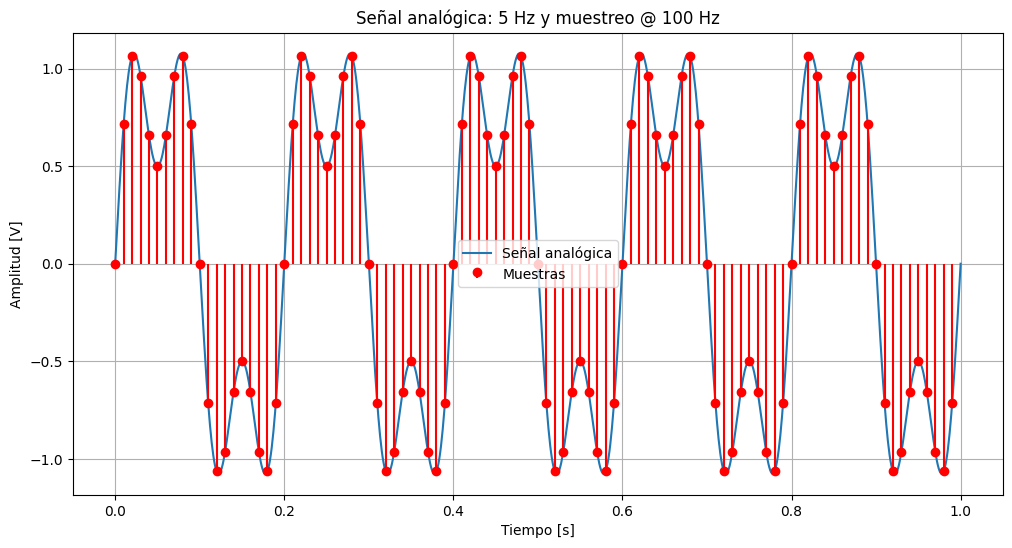


Primeras 5 muestras:
Muestra 1: Tiempo = 0.000 s, Valor = 0.000 V
Muestra 2: Tiempo = 0.010 s, Valor = 0.714 V
Muestra 3: Tiempo = 0.020 s, Valor = 1.063 V
Muestra 4: Tiempo = 0.030 s, Valor = 0.964 V
Muestra 5: Tiempo = 0.040 s, Valor = 0.657 V


In [ ]:
plt.figure(figsize=(12, 6))

print("=== ETAPA 1: MUESTREO ===")
print(f"Frecuencia de la señal: {fm1} Hz")
print(f"Amplitud máxima: {Am1} V")
print(f"Frecuencia de muestreo: {fs} Hz")
print(f"Tasa de Nyquist (2·fmax): {nyquist} Hz")
print(f"¿Cumple Nyquist? {fs >= nyquist}")

Am = Am1 + Am2
# Tiempo continuo y discreto
t = np.linspace(0, t_final, 1000)
ts = np.arange(0, t_final, 1/fs)

#suma de dos senos
m_t  = Am1 * np.sin(2*np.pi*fm1 * t)
m_t += Am2 * np.sin(2*np.pi*fm2 * t)

# Muestreo
ts = np.arange(0, t_final, 1/fs) # Instantes de muestreo
m_ts = Am1 * np.sin(2*np.pi*fm1 * ts) + Am2 * np.sin(2*np.pi*fm2 * ts) # Muestras discretas

# Gráficas
plt.plot(t, m_t, label='Señal analógica')
plt.stem(ts, m_ts, linefmt='r', markerfmt='ro', basefmt=' ', label='Muestras')
plt.title(f'Señal analógica: {fm} Hz y muestreo @ {fs} Hz')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.legend()
plt.grid()
plt.show()

print("\nPrimeras 5 muestras:")
for i, (tiempo, muestra) in enumerate(zip(ts[:5], m_ts[:5])):
    print(f"Muestra {i+1}: Tiempo = {tiempo:.3f} s, Valor = {muestra:.3f} V")

# **4. Cuantización Uniforme (Parte b)**

1. Calcula los parámetros de cuantización
2. Realiza la cuantización de las muestras
3. Calcula y muestra el error de cuantización
4. Grafica resultados



=== ETAPA 2: CUANTIZACIÓN ===
Bits de cuantización: 3
Niveles de cuantización: 8
Paso de cuantización (Δ): 0.375 V
Rango de cuantización: [-1.5 V, 1.5 V]



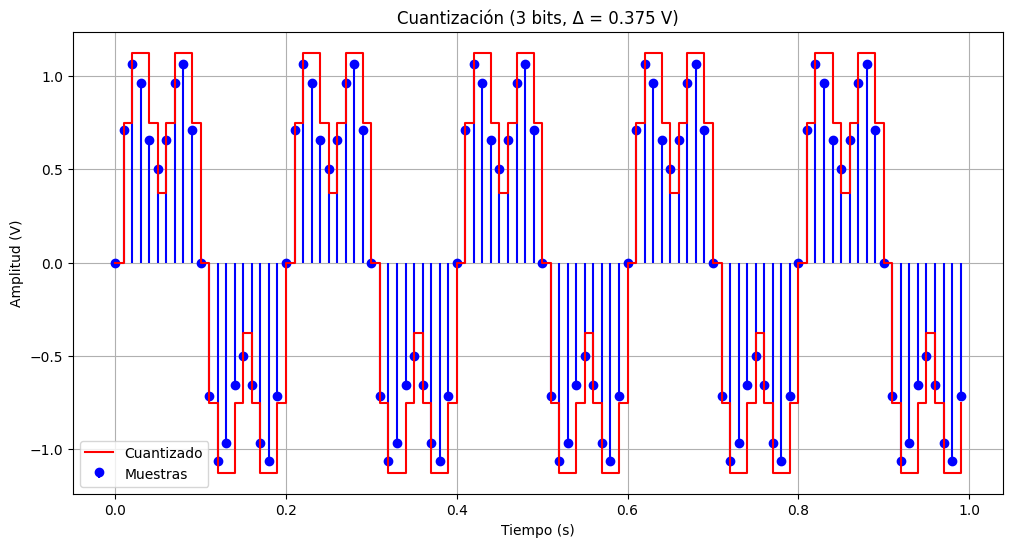

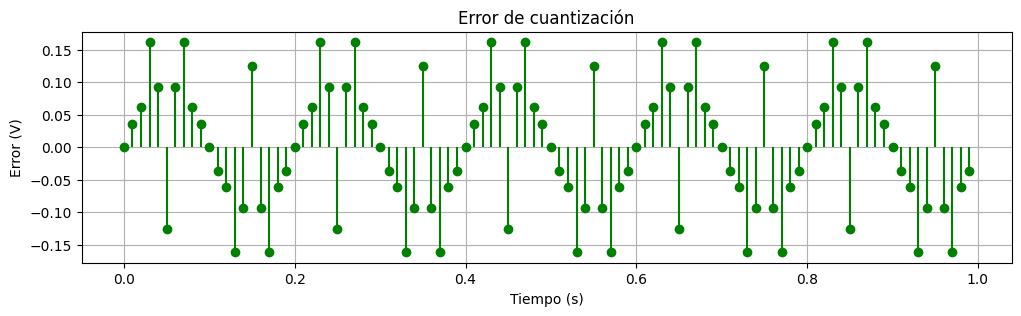


Comparación muestras originales vs cuantizadas:
Tiempo [s] | Original [V] | Cuantizado [V] | Error [V]
0.000      |   0.000     |   0.000       |   0.000
0.010      |   0.714     |   0.750       |   0.036
0.020      |   1.063     |   1.125       |   0.062
0.030      |   0.964     |   1.125       |   0.161
0.040      |   0.657     |   0.750       |   0.093


In [ ]:
plt.figure(figsize=(12, 6))

# Cálculo de parámetros
niveles = 2**bits
delta = (2 * Am) / niveles

print("\n\n=== ETAPA 2: CUANTIZACIÓN ===")
print(f"Bits de cuantización: {bits}")
print(f"Niveles de cuantización: {niveles}")
print(f"Paso de cuantización (Δ): {delta:.3f} V")
print(f"Rango de cuantización: [{-Am:.1f} V, {Am:.1f} V]\n")

# Proceso de cuantización
m_quant = delta * np.round(m_ts / delta)
error = m_quant - m_ts

# Gráfico de cuantización
plt.stem(ts, m_ts, linefmt='b', markerfmt='bo', basefmt=' ', label='Muestras')
plt.step(ts, m_quant, where='post', color='r', label='Cuantizado')
plt.title(f'Cuantización ({bits} bits, Δ = {delta:.3f} V)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')
plt.legend()
plt.grid()

# Gráfico de error
plt.figure(figsize=(12, 3))
plt.stem(ts, error, linefmt='g', markerfmt='go', basefmt=' ')
plt.title('Error de cuantización')
plt.xlabel('Tiempo (s)')
plt.ylabel('Error (V)')
plt.grid()
plt.show()

print("\nComparación muestras originales vs cuantizadas:")
print("Tiempo [s] | Original [V] | Cuantizado [V] | Error [V]")
for t, orig, cuant in zip(ts[:5], m_ts[:5], m_quant[:5]):
    print(f"{t:.3f}      | {orig:7.3f}     | {cuant:7.3f}       | {cuant-orig:7.3f}")

# **5. Codificación Binaria (Parte c)**

1. Asigna códigos binarios a cada nivel de cuantización
2. Muestra tabla de códigos
3. Grafica la representación digital

Tabla de codificación:
Nivel | Rango [V]       | Código binario
  0  | [-1.500, -1.125) | 000
  1  | [-1.125, -0.750) | 001
  2  | [-0.750, -0.375) | 010
  3  | [-0.375, 0.000) | 011
  4  | [0.000, 0.375) | 100
  5  | [0.375, 0.750) | 101
  6  | [0.750, 1.125) | 110
  7  | [1.125, 1.500) | 111


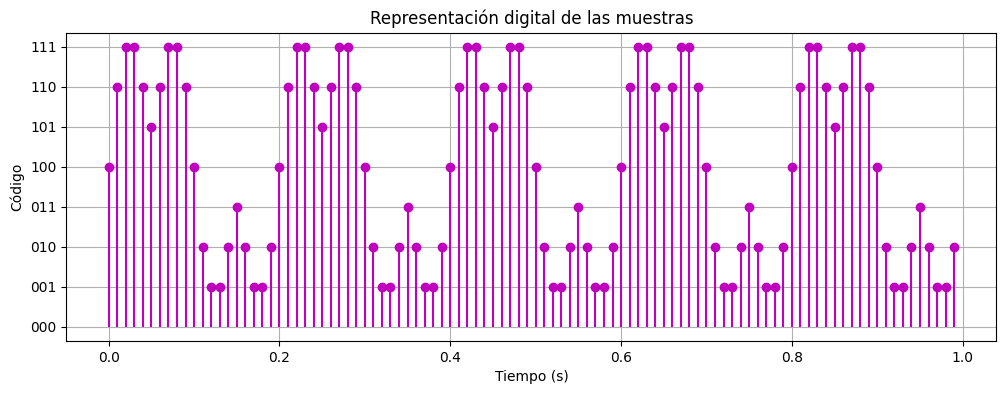

In [ ]:
plt.figure(figsize=(12, 4))

# Generación de códigos binarios
codigos = [f"{int((sample + Am)/delta):0{bits}b}" for sample in m_quant]

# Tabla de códigos
print("Tabla de codificación:")
print("Nivel | Rango [V]       | Código binario")
for i in range(niveles):
    min_val = -Am + i*delta
    max_val = -Am + (i+1)*delta
    print(f"{i:3}  | [{min_val:.3f}, {max_val:.3f}) | {i:0{bits}b}")

# Gráfico de códigos
plt.stem(ts, [int(code, 2) for code in codigos], linefmt='m', markerfmt='mo', basefmt=' ')
plt.title('Representación digital de las muestras')
plt.xlabel('Tiempo (s)')
plt.ylabel('Código')
plt.yticks(range(2**bits), [f"{i:0{bits}b}" for i in range(2**bits)])
plt.grid()
plt.show()

# **6. Formatos de Señalización (Parte d)**

1. Genera diferentes esquemas de codificación de línea
2. Grafica 6 formatos de pulsos diferentes
3. Muestra la relación entre bits y formas de onda

Formato Unipolar NRZ - Códigos: 100 110 111 111 110 101 110 111 111 110 100 010 001 001 010 011 010 001 001 010 100 110 111 111 110 101 110 111 111 110 100 010 001 001 010 011 010 001 001 010 100 110 111 111 110 101 110 111 111 110 100 010 001 001 010 011 010 001 001 010 100 110 111 111 110 101 110 111 111 110 100 010 001 001 010 011 010 001 001 010 100 110 111 111 110 101 110 111 111 110 100 010 001 001 010 011 010 001 001 010
Formato Bipolar NRZ - Códigos: 100 110 111 111 110 101 110 111 111 110 100 010 001 001 010 011 010 001 001 010 100 110 111 111 110 101 110 111 111 110 100 010 001 001 010 011 010 001 001 010 100 110 111 111 110 101 110 111 111 110 100 010 001 001 010 011 010 001 001 010 100 110 111 111 110 101 110 111 111 110 100 010 001 001 010 011 010 001 001 010 100 110 111 111 110 101 110 111 111 110 100 010 001 001 010 011 010 001 001 010
Formato Unipolar RZ - Códigos: 100 110 111 111 110 101 110 111 111 110 100 010 001 001 010 011 010 001 001 010 100 110 111 111 110 101 11

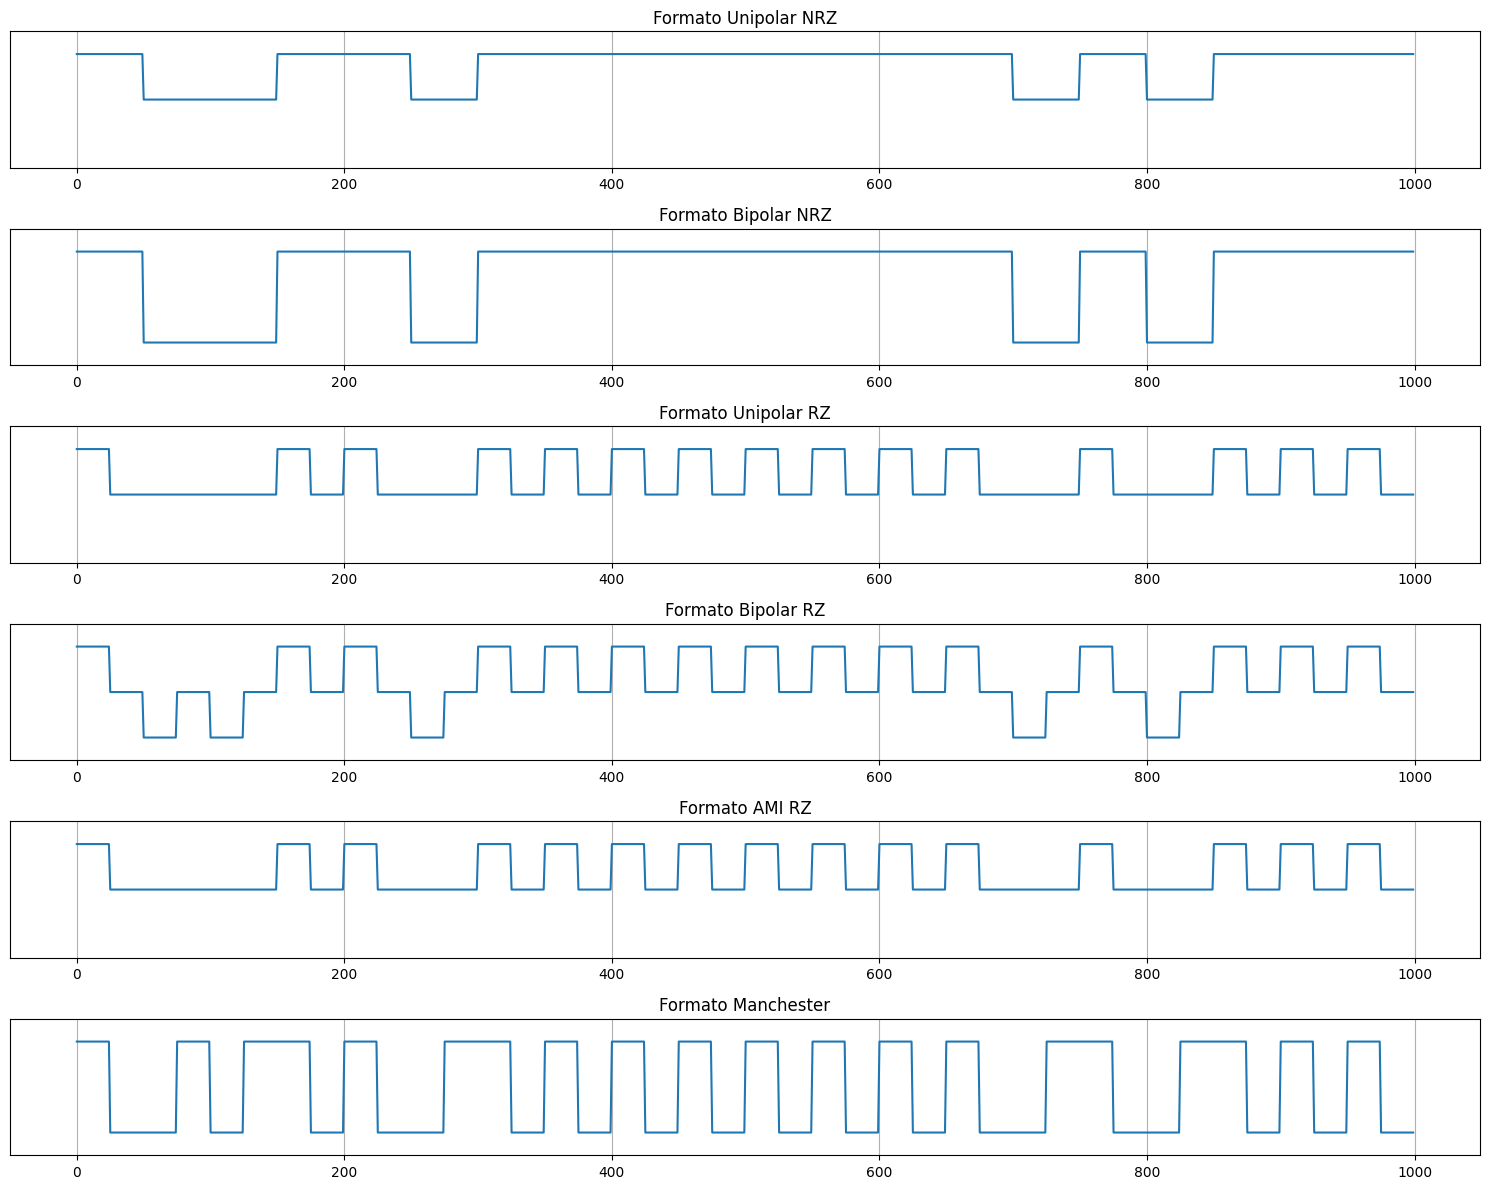

In [ ]:
def generar_formato(codigos, formato):
    '''Convierte los códigos binarios en formas de onda según el formato'''
    waveform = []
    for code in codigos:
        bits = list(code)
        for bit in bits:
            if formato == 'Unipolar NRZ':
                waveform.extend([int(bit)]*50)
            elif formato == 'Bipolar NRZ':
                waveform.extend([1 if bit == '1' else -1]*50)
            elif formato == 'Unipolar RZ':
                waveform.extend([int(bit)]*25 + [0]*25)
            elif formato == 'Bipolar RZ':
                waveform.extend([1 if bit == '1' else -1]*25 + [0]*25)
            elif formato == 'AMI RZ':
                waveform.extend([1]*25 + [0]*25 if bit == '1' else [0]*50)
            elif formato == 'Manchester':
                waveform.extend([1 if bit == '1' else -1]*25 + [-1 if bit == '1' else 1]*25)
    return waveform[:1000]

# Lista de formatos a graficar
formatos = ['Unipolar NRZ', 'Bipolar NRZ', 'Unipolar RZ',
           'Bipolar RZ', 'AMI RZ', 'Manchester']

plt.figure(figsize=(15, 12))
for i, fmt in enumerate(formatos, 1):
    plt.subplot(6, 1, i)
    señal = generar_formato(codigos, fmt)
    plt.plot(señal, linewidth=1.5)
    plt.title(f'Formato {fmt}')
    print(f'Formato {fmt} - Códigos: {" ".join(codigos)}')
    plt.yticks([])
    plt.ylim(-1.5, 1.5)
    plt.grid()

plt.tight_layout()
plt.show()

#**7. Uso del demodulador(Parte C)**


1. Implementa la ecuación 5.2
2. Reconstruye la señal desde las muestras cuantizadas
3. Compara con la señal original


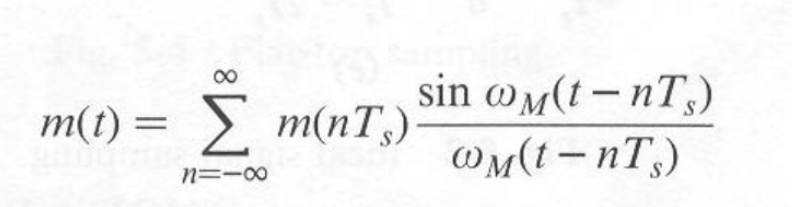

Error RMS: 0.098


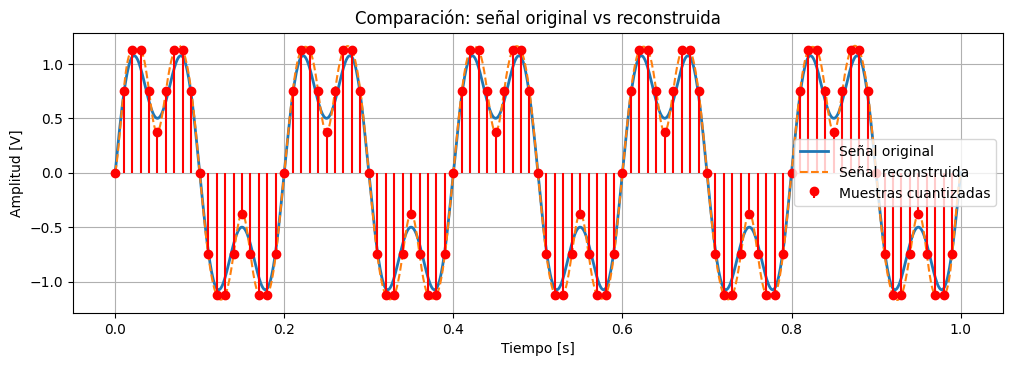

In [ ]:
def reconstruct_signal(t_samp, m_q, t_cont, fs):
    '''
    Reconstruye la señal continua usando interpolación sinc
    '''
    T = 1 / fs  # Período de muestreo
    m_rec = np.zeros_like(t_cont)

    for n, sample in enumerate(m_q):
        m_rec += sample * np.sinc((t_cont - t_samp[n]) / T)
    return m_rec

# Reconstrucción de la señal
t_cont = np.linspace(0, t_final, 1000)
m_rec = reconstruct_signal(ts, m_quant, t_cont, fs)

# Cálculo del error de reconstrucción
error_reconstruccion = m_t - m_rec

# Gráfico comparativo
plt.figure(figsize=(12, 8))

# Señal original vs reconstruida
plt.subplot(2, 1, 1)
plt.plot(t_cont, m_t, label='Señal original', linewidth=2)
plt.plot(t_cont, m_rec, '--', label='Señal reconstruida', linewidth=1.5)
plt.stem(ts, m_quant, linefmt='r', markerfmt='ro', basefmt=' ', label='Muestras cuantizadas')
plt.title('Comparación: señal original vs reconstruida')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.legend()
plt.grid()

# Métricas de calidad
snr = 10 * np.log10(np.var(m_t) / np.var(error_reconstruccion))
print(f"Error RMS: {np.sqrt(np.mean(error_reconstruccion**2)):.3f}")